## Machine Learning Coursework—Neural network part

### Written by Yan Lin,  submitted on 20 February, 2023

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [47]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol','quality']

raw_dataset = pd.read_csv(url, na_values='?', comment='\t',sep=';', skipinitialspace=True)

In [48]:
dataset = raw_dataset.copy()
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


### Clean the data

In [49]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [50]:
dataset = dataset.dropna()

In [51]:
dataset = dataset.apply(pd.to_numeric, errors='coerce')
print(dataset.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [52]:
# Convert 'quality' variable to binary class
dataset['quality'] = dataset['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [53]:
# Calculating the correlation coefficient matrix
cor_matrix = dataset.corr()
cor_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.080748
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.067225
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.035330
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.117085
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183118
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.023413
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.162202
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.283871
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.093510
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.047410


In [54]:
# Splitting the data set into two subsets
d2_0 = dataset[dataset.quality == 0].iloc[:, :-1]
d2_1 = dataset[dataset.quality == 1].iloc[:, :-1]

In [55]:
# Calculate the variance matrix and covariance matrix for each subset
var_matrix_0 = np.var(d2_0, axis=0)
var_matrix_1 = np.var(d2_1, axis=0)

cov_matrix_0 = np.cov(d2_0.T)
cov_matrix_1 = np.cov(d2_1.T)

In [56]:
var_matrix_0,var_matrix_1

(fixed acidity              0.739594
 volatile acidity           0.010461
 citric acid                0.016885
 residual sugar            27.294014
 chlorides                  0.000554
 free sulfur dioxide      316.324283
 total sulfur dioxide    1948.308789
 density                    0.000008
 pH                         0.022021
 sulphates                  0.011697
 alcohol                    1.210951
 dtype: float64,
 fixed acidity              0.590493
 volatile acidity           0.008846
 citric acid                0.006440
 residual sugar            18.393985
 chlorides                  0.000124
 free sulfur dioxide      190.181651
 total sulfur dioxide    1069.905402
 density                    0.000008
 pH                         0.024684
 sulphates                  0.017684
 alcohol                    1.574064
 dtype: float64)

In [57]:
cov_df_0=pd.DataFrame(cov_matrix_0, columns=d2_0.columns, index=d2_0.columns)
cov_df_0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,0.739786,-0.001064,0.032992,0.207067,-0.000205,-0.943361,2.253866,0.000524,-0.051838,0.001115,-0.037553
volatile acidity,-0.001064,0.010464,-0.001873,0.041570,0.000247,-0.155567,0.513420,0.000024,-0.000707,-0.000305,-0.001738
citric acid,0.032992,-0.001873,0.016889,0.066537,0.000338,0.206014,0.680726,0.000057,-0.003441,0.001205,-0.008349
residual sugar,0.207067,0.041570,0.066537,27.301127,0.005776,30.673526,87.988364,0.012907,-0.113968,0.005439,-2.511217
chlorides,-0.000205,0.000247,0.000338,0.005776,0.000554,0.038477,0.161859,0.000013,-0.000254,0.000068,-0.007840
free sulfur dioxide,-0.943361,-0.155567,0.206014,30.673526,0.038477,316.406723,496.111385,0.016813,-0.006801,0.067361,-5.540173
total sulfur dioxide,2.253866,0.513420,0.680726,87.988364,0.161859,496.111385,1948.816558,0.064413,0.194902,0.871520,-20.693733
density,0.000524,0.000024,0.000057,0.012907,0.000013,0.016813,0.064413,0.000008,-0.000016,0.000036,-0.002341
pH,-0.051838,-0.000707,-0.003441,-0.113968,-0.000254,-0.006801,0.194902,-0.000016,0.022027,0.002171,0.013291
sulphates,0.001115,-0.000305,0.001205,0.005439,0.000068,0.067361,0.871520,0.000036,0.002171,0.011700,-0.004385


In [58]:
cov_df_1=pd.DataFrame(cov_matrix_1, columns=d2_0.columns, index=d2_0.columns)
cov_df_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,0.591050,-0.007206,0.015680,0.824538,0.001451,0.014381,4.764318,0.000932,-0.058659,-0.009971,-0.295082
volatile acidity,-0.007206,0.008854,-0.001780,-0.017252,-0.000301,-0.217825,-0.308155,-0.000077,0.000759,-0.000625,0.059990
citric acid,0.015680,-0.001780,0.006446,0.014592,0.000094,0.141068,0.278093,0.000029,-0.001091,-0.000278,-0.012533
residual sugar,0.824538,-0.017252,0.014592,18.411355,0.013530,7.075646,62.403926,0.009755,-0.235830,-0.076221,-2.606353
chlorides,0.001451,-0.000301,0.000094,0.013530,0.000124,0.027436,0.140047,0.000015,-0.000199,0.000047,-0.007606
free sulfur dioxide,0.014381,-0.217825,0.141068,7.075646,0.027436,190.361237,246.919148,0.006724,0.043305,0.297391,-3.259269
total sulfur dioxide,4.764318,-0.308155,0.278093,62.403926,0.140047,246.919148,1070.915700,0.051000,-0.187214,0.032694,-18.474242
density,0.000932,-0.000077,0.000029,0.009755,0.000015,0.006724,0.051000,0.000008,-0.000082,0.000007,-0.002935
pH,-0.058659,0.000759,-0.001091,-0.235830,-0.000199,0.043305,-0.187214,-0.000082,0.024707,0.004209,0.025242
sulphates,-0.009971,-0.000625,-0.000278,-0.076221,0.000047,0.297391,0.032694,0.000007,0.004209,0.017701,-0.007292


In [59]:
# Dividing the training and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [60]:
# Distinguishing features and labels
train_features = train_dataset.drop('quality', axis=1)
test_features = test_dataset.drop('quality', axis=1)

train_labels = train_dataset['quality']
test_labels = test_dataset['quality']

### Normalization

In [61]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [63]:
datavalues=train_features.values
data_train_features_norm=np.copy(datavalues)
data_train_features_norm[:,0:11]=(datavalues[:,0:11]-np.mean(datavalues[:,0:11],axis=0))/np.std(datavalues[:,0:11],axis=0)
datavalues=test_features.values
data_test_features_norm=np.copy(datavalues)
data_test_features_norm[:,0:11]=(datavalues[:,0:11]-np.mean(datavalues[:,0:11],axis=0))/np.std(datavalues[:,0:11],axis=0)

In [64]:
data_train_features_norm

array([[ 0.516,  0.417,  0.125, ...,  0.348, -0.605,  0.149],
       [ 0.165,  0.317, -0.612, ..., -0.38 , -0.255, -0.583],
       [ 0.867, -1.381,  3.318, ..., -0.777, -0.781,  0.23 ],
       ...,
       [-0.069, -0.682, -0.53 , ...,  0.745, -1.131, -1.477],
       [ 0.399,  1.215, -0.775, ...,  0.083,  0.271, -1.07 ],
       [-0.419,  1.615,  1.271, ..., -0.512, -1.043, -1.477]])

In [65]:
alcohol_train_norm = data_train_features_norm[:,10]
alcohol_test_norm = data_test_features_norm[:,10]
train_label_values=train_labels.values
test_label_values=test_labels.values

In [66]:
#Classification problems with dnn models
num_classes=2
batch_size = 128
epochs = 250

In [67]:
#model1:four hidden layer+softmax
model_DNN_1 = keras.Sequential(
    [
        keras.Input(shape=11),   
        layers.Flatten(),   
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_DNN_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 11)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                384       
                                                                 
 dense_31 (Dense)            (None, 32)                1056      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 32)                1056      
                                                                 
 dense_34 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,618
Trainable params: 3,618
Non-traina

In [68]:
model_DNN_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_DNN_1.fit(data_train_features_norm, keras.utils.to_categorical(train_label_values,num_classes), 
              batch_size=batch_size, epochs=epochs, validation_split=0.1)
#Overfitting, the training and validation sets are very different

Epoch 1/250
28/28 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7513 - val_loss: 0.4855 - val_accuracy: 0.7934
Epoch 2/250
28/28 [==============================] - 0s 987us/step - loss: 0.4702 - accuracy: 0.7805 - val_loss: 0.4451 - val_accuracy: 0.7934
Epoch 3/250
28/28 [==============================] - 0s 958us/step - loss: 0.4263 - accuracy: 0.7873 - val_loss: 0.4236 - val_accuracy: 0.7883
Epoch 4/250
28/28 [==============================] - 0s 904us/step - loss: 0.3997 - accuracy: 0.7986 - val_loss: 0.4107 - val_accuracy: 0.7755
Epoch 5/250
28/28 [==============================] - 0s 988us/step - loss: 0.3880 - accuracy: 0.8037 - val_loss: 0.4090 - val_accuracy: 0.7985
Epoch 6/250
28/28 [==============================] - 0s 899us/step - loss: 0.3797 - accuracy: 0.8080 - val_loss: 0.3993 - val_accuracy: 0.7908
Epoch 7/250
28/28 [==============================] - 0s 922us/step - loss: 0.3724 - accuracy: 0.8094 - val_loss: 0.3979 - val_accuracy: 0.8010
E

Epoch 58/250
28/28 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 0.9254 - val_loss: 0.4193 - val_accuracy: 0.8520
Epoch 59/250
28/28 [==============================] - 0s 941us/step - loss: 0.1822 - accuracy: 0.9285 - val_loss: 0.4481 - val_accuracy: 0.8444
Epoch 60/250
28/28 [==============================] - 0s 931us/step - loss: 0.1796 - accuracy: 0.9274 - val_loss: 0.4485 - val_accuracy: 0.8469
Epoch 61/250
28/28 [==============================] - 0s 971us/step - loss: 0.1756 - accuracy: 0.9291 - val_loss: 0.4416 - val_accuracy: 0.8495
Epoch 62/250
28/28 [==============================] - 0s 923us/step - loss: 0.1762 - accuracy: 0.9314 - val_loss: 0.4617 - val_accuracy: 0.8393
Epoch 63/250
28/28 [==============================] - 0s 902us/step - loss: 0.1746 - accuracy: 0.9311 - val_loss: 0.4767 - val_accuracy: 0.8342
Epoch 64/250
28/28 [==============================] - 0s 924us/step - loss: 0.1801 - accuracy: 0.9248 - val_loss: 0.4405 - val_accuracy: 0

Epoch 115/250
28/28 [==============================] - 0s 928us/step - loss: 0.0986 - accuracy: 0.9583 - val_loss: 0.7195 - val_accuracy: 0.8342
Epoch 116/250
28/28 [==============================] - 0s 897us/step - loss: 0.0908 - accuracy: 0.9648 - val_loss: 0.7189 - val_accuracy: 0.8393
Epoch 117/250
28/28 [==============================] - 0s 933us/step - loss: 0.0883 - accuracy: 0.9665 - val_loss: 0.7015 - val_accuracy: 0.8316
Epoch 118/250
28/28 [==============================] - 0s 875us/step - loss: 0.0879 - accuracy: 0.9660 - val_loss: 0.7181 - val_accuracy: 0.8444
Epoch 119/250
28/28 [==============================] - 0s 918us/step - loss: 0.0759 - accuracy: 0.9736 - val_loss: 0.7567 - val_accuracy: 0.8418
Epoch 120/250
28/28 [==============================] - 0s 897us/step - loss: 0.0839 - accuracy: 0.9708 - val_loss: 0.7603 - val_accuracy: 0.8393
Epoch 121/250
28/28 [==============================] - 0s 927us/step - loss: 0.0741 - accuracy: 0.9762 - val_loss: 0.7841 - val_ac

28/28 [==============================] - 0s 984us/step - loss: 0.0101 - accuracy: 0.9991 - val_loss: 1.5130 - val_accuracy: 0.8444
Epoch 228/250
28/28 [==============================] - 0s 933us/step - loss: 0.0103 - accuracy: 0.9997 - val_loss: 1.5081 - val_accuracy: 0.8444
Epoch 229/250
28/28 [==============================] - 0s 947us/step - loss: 0.0099 - accuracy: 0.9994 - val_loss: 1.5069 - val_accuracy: 0.8444
Epoch 230/250
28/28 [==============================] - 0s 975us/step - loss: 0.0098 - accuracy: 0.9991 - val_loss: 1.5121 - val_accuracy: 0.8469
Epoch 231/250
28/28 [==============================] - 0s 915us/step - loss: 0.0113 - accuracy: 0.9991 - val_loss: 1.5293 - val_accuracy: 0.8444
Epoch 232/250
28/28 [==============================] - 0s 961us/step - loss: 0.0099 - accuracy: 0.9994 - val_loss: 1.5390 - val_accuracy: 0.8418
Epoch 233/250
28/28 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9994 - val_loss: 1.5574 - val_accuracy: 0.8444
E

In [69]:
# model_DNN.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# model_DNN.fit(data_train_features_norm, train_label_values, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [70]:
score_1 = model_DNN_1.evaluate(data_test_features_norm, keras.utils.to_categorical(test_label_values, num_classes), verbose=0)
print("Test loss:", score_1[0])
print("Test accuracy:", score_1[1])

Test loss: 1.3344687223434448
Test accuracy: 0.8479591608047485


In [71]:
#Four hidden layers + sigmoid
model_DNN_2 = keras.Sequential(
    [
        keras.Input(shape=11),   
        layers.Flatten(),   
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model_DNN_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 11)                0         
                                                                 
 dense_35 (Dense)            (None, 32)                384       
                                                                 
 dense_36 (Dense)            (None, 32)                1056      
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dense_39 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,618
Trainable params: 3,618
Non-traina

In [72]:
model_DNN_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_DNN_2.fit(data_train_features_norm, keras.utils.to_categorical(train_label_values,num_classes), 
              batch_size=batch_size, epochs=epochs, validation_split=0.1)
#Overfitting, the training and validation sets are very different

Epoch 1/250
28/28 [==============================] - 1s 4ms/step - loss: 0.5109 - accuracy: 0.7805 - val_loss: 0.4677 - val_accuracy: 0.7934
Epoch 2/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7930 - val_loss: 0.4438 - val_accuracy: 0.7959
Epoch 3/250
28/28 [==============================] - 0s 922us/step - loss: 0.4251 - accuracy: 0.8088 - val_loss: 0.4268 - val_accuracy: 0.7985
Epoch 4/250
28/28 [==============================] - 0s 919us/step - loss: 0.4060 - accuracy: 0.8094 - val_loss: 0.4215 - val_accuracy: 0.7985
Epoch 5/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8128 - val_loss: 0.4160 - val_accuracy: 0.7832
Epoch 6/250
28/28 [==============================] - 0s 924us/step - loss: 0.3884 - accuracy: 0.8137 - val_loss: 0.4065 - val_accuracy: 0.8061
Epoch 7/250
28/28 [==============================] - 0s 959us/step - loss: 0.3793 - accuracy: 0.8185 - val_loss: 0.3978 - val_accuracy: 0.8087
Epoch

28/28 [==============================] - 0s 873us/step - loss: 0.1993 - accuracy: 0.9146 - val_loss: 0.4322 - val_accuracy: 0.8291
Epoch 59/250
28/28 [==============================] - 0s 914us/step - loss: 0.1904 - accuracy: 0.9226 - val_loss: 0.4492 - val_accuracy: 0.8265
Epoch 60/250
28/28 [==============================] - 0s 870us/step - loss: 0.1890 - accuracy: 0.9248 - val_loss: 0.4436 - val_accuracy: 0.8316
Epoch 61/250
28/28 [==============================] - 0s 880us/step - loss: 0.1841 - accuracy: 0.9271 - val_loss: 0.4462 - val_accuracy: 0.8265
Epoch 62/250
28/28 [==============================] - 0s 867us/step - loss: 0.1844 - accuracy: 0.9265 - val_loss: 0.4414 - val_accuracy: 0.8444
Epoch 63/250
28/28 [==============================] - 0s 852us/step - loss: 0.1787 - accuracy: 0.9277 - val_loss: 0.4427 - val_accuracy: 0.8520
Epoch 64/250
28/28 [==============================] - 0s 877us/step - loss: 0.1772 - accuracy: 0.9268 - val_loss: 0.4760 - val_accuracy: 0.8342
Epoch

Epoch 115/250
28/28 [==============================] - 0s 929us/step - loss: 0.0868 - accuracy: 0.9708 - val_loss: 0.6731 - val_accuracy: 0.8469
Epoch 116/250
28/28 [==============================] - 0s 886us/step - loss: 0.0829 - accuracy: 0.9739 - val_loss: 0.6632 - val_accuracy: 0.8597
Epoch 117/250
28/28 [==============================] - 0s 922us/step - loss: 0.0839 - accuracy: 0.9719 - val_loss: 0.6853 - val_accuracy: 0.8495
Epoch 118/250
28/28 [==============================] - 0s 927us/step - loss: 0.0815 - accuracy: 0.9731 - val_loss: 0.7004 - val_accuracy: 0.8367
Epoch 119/250
28/28 [==============================] - 0s 916us/step - loss: 0.0780 - accuracy: 0.9731 - val_loss: 0.7328 - val_accuracy: 0.8265
Epoch 120/250
28/28 [==============================] - 0s 908us/step - loss: 0.0772 - accuracy: 0.9719 - val_loss: 0.7005 - val_accuracy: 0.8418
Epoch 121/250
28/28 [==============================] - 0s 918us/step - loss: 0.0856 - accuracy: 0.9668 - val_loss: 0.7358 - val_ac

28/28 [==============================] - 0s 882us/step - loss: 0.0188 - accuracy: 0.9966 - val_loss: 1.3548 - val_accuracy: 0.8546
Epoch 228/250
28/28 [==============================] - 0s 874us/step - loss: 0.0151 - accuracy: 0.9972 - val_loss: 1.3711 - val_accuracy: 0.8597
Epoch 229/250
28/28 [==============================] - 0s 897us/step - loss: 0.0154 - accuracy: 0.9974 - val_loss: 1.3773 - val_accuracy: 0.8495
Epoch 230/250
28/28 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 0.9977 - val_loss: 1.4332 - val_accuracy: 0.8520
Epoch 231/250
28/28 [==============================] - 0s 931us/step - loss: 0.0155 - accuracy: 0.9972 - val_loss: 1.3680 - val_accuracy: 0.8469
Epoch 232/250
28/28 [==============================] - 0s 896us/step - loss: 0.0157 - accuracy: 0.9966 - val_loss: 1.3563 - val_accuracy: 0.8520
Epoch 233/250
28/28 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9943 - val_loss: 1.3418 - val_accuracy: 0.8597
Epo

In [73]:
score_2 = model_DNN_2.evaluate(data_test_features_norm, keras.utils.to_categorical(test_label_values, num_classes), verbose=0)
print("Test loss:", score_2[0])
print("Test accuracy:", score_2[1])

Test loss: 1.2608349323272705
Test accuracy: 0.8459183573722839


In [74]:
#Four hidden layers + softmax + canonical
from tensorflow.keras.regularizers import l1_l2
model_DNN_reg = keras.Sequential(
    [
        keras.Input(shape=11),   
        layers.Flatten(),   
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_DNN_reg.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 11)                0         
                                                                 
 dense_40 (Dense)            (None, 64)                768       
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 64)               

In [75]:
model_DNN_reg.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_DNN_reg.fit(data_train_features_norm, keras.utils.to_categorical(train_label_values,num_classes), 
              batch_size=batch_size, epochs=epochs, 
              validation_split=0.1)

Epoch 1/250
28/28 [==============================] - 1s 6ms/step - loss: 18.2524 - accuracy: 0.7782 - val_loss: 15.5580 - val_accuracy: 0.7934
Epoch 2/250
28/28 [==============================] - 0s 2ms/step - loss: 13.4702 - accuracy: 0.7805 - val_loss: 11.2982 - val_accuracy: 0.7934
Epoch 3/250
28/28 [==============================] - 0s 2ms/step - loss: 9.6111 - accuracy: 0.7816 - val_loss: 7.8852 - val_accuracy: 0.7959
Epoch 4/250
28/28 [==============================] - 0s 2ms/step - loss: 6.5689 - accuracy: 0.8023 - val_loss: 5.2539 - val_accuracy: 0.8061
Epoch 5/250
28/28 [==============================] - 0s 2ms/step - loss: 4.2682 - accuracy: 0.8035 - val_loss: 3.2950 - val_accuracy: 0.8087
Epoch 6/250
28/28 [==============================] - 0s 2ms/step - loss: 2.5786 - accuracy: 0.8066 - val_loss: 1.9100 - val_accuracy: 0.8010
Epoch 7/250
28/28 [==============================] - 0s 2ms/step - loss: 1.4642 - accuracy: 0.8035 - val_loss: 1.0674 - val_accuracy: 0.7959
Epoch 8/2

Epoch 59/250
28/28 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.8162 - val_loss: 0.4711 - val_accuracy: 0.8138
Epoch 60/250
28/28 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8244 - val_loss: 0.4661 - val_accuracy: 0.8138
Epoch 61/250
28/28 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8261 - val_loss: 0.4658 - val_accuracy: 0.8061
Epoch 62/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8242 - val_loss: 0.4671 - val_accuracy: 0.8138
Epoch 63/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.8253 - val_loss: 0.4648 - val_accuracy: 0.8036
Epoch 64/250
28/28 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8205 - val_loss: 0.4673 - val_accuracy: 0.8138
Epoch 65/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8259 - val_loss: 0.4663 - val_accuracy: 0.8061
Epoch 

28/28 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8698 - val_loss: 0.4600 - val_accuracy: 0.8214
Epoch 174/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8715 - val_loss: 0.4658 - val_accuracy: 0.8112
Epoch 175/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8712 - val_loss: 0.4725 - val_accuracy: 0.8265
Epoch 176/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8619 - val_loss: 0.4648 - val_accuracy: 0.8214
Epoch 177/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8690 - val_loss: 0.4565 - val_accuracy: 0.8087
Epoch 178/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.8684 - val_loss: 0.4756 - val_accuracy: 0.8138
Epoch 179/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8639 - val_loss: 0.4664 - val_accuracy: 0.8214
Epoch 180/250

In [76]:
 score_reg = model_DNN_reg.evaluate(data_test_features_norm, keras.utils.to_categorical(test_label_values, num_classes), verbose=0)
print("Test loss:", score_reg[0])
print("Test accuracy:", score_reg[1])

Test loss: 0.46744176745414734
Test accuracy: 0.8346938490867615


In [80]:
#Add callback and lr
model_DNN_reg.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
early = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=30, 
                                      verbose=0, mode='auto', baseline=None, restore_best_weights=False)
lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, 
                                       verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
history=model_DNN_reg.fit(data_train_features_norm.reshape(3918,11,1), 
              keras.utils.to_categorical(train_label_values,num_classes), 
              batch_size=batch_size, 
              epochs=epochs, 
              validation_split=0.1,
              callbacks=[early,lr])

Epoch 1/250
28/28 [==============================] - 1s 5ms/step - loss: 0.3398 - accuracy: 0.8979 - val_loss: 0.4981 - val_accuracy: 0.8163 - lr: 0.0010
Epoch 2/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.8945 - val_loss: 0.5244 - val_accuracy: 0.8138 - lr: 0.0010
Epoch 3/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.9027 - val_loss: 0.5032 - val_accuracy: 0.8112 - lr: 0.0010
Epoch 4/250
28/28 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8990 - val_loss: 0.4887 - val_accuracy: 0.8163 - lr: 0.0010
Epoch 5/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.9010 - val_loss: 0.5315 - val_accuracy: 0.8112 - lr: 0.0010
Epoch 6/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.9022 - val_loss: 0.5195 - val_accuracy: 0.8087 - lr: 0.0010
Epoch 7/250
28/28 [==============================] - 0s 1ms/step - loss: 0.3

In [81]:
score_reg_new = model_DNN_reg.evaluate(data_test_features_norm, keras.utils.to_categorical(test_label_values, num_classes), verbose=0)
print("Test loss:", score_reg_new[0])
print("Test accuracy:", score_reg_new[1])

Test loss: 0.47235870361328125
Test accuracy: 0.8377550840377808


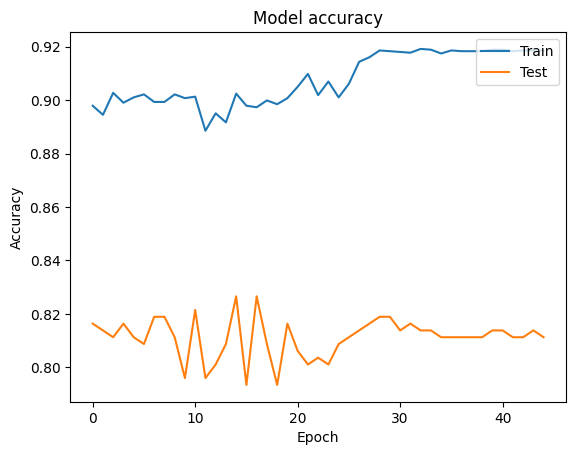

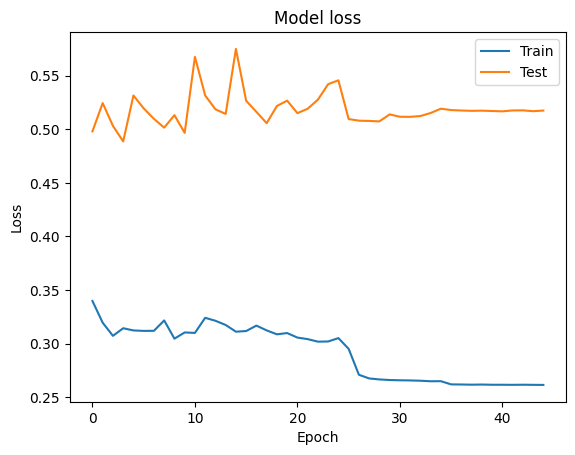

In [82]:
# Plotting accuracy values for training & validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [83]:
#Changing learning rates
opt = keras.optimizers.Adam(learning_rate=0.001)
model_DNN_reg.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [90]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10)
history_new=model_DNN_reg.fit(data_train_features_norm, keras.utils.to_categorical(train_label_values,num_classes), 
                  batch_size=batch_size, epochs=epochs, 
                  validation_split=0.1,
                  callbacks=[lr_scheduler])

Epoch 1/300
56/56 [==============================] - 0s 7ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-27
Epoch 2/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-27
Epoch 3/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-27
Epoch 4/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-27
Epoch 5/300
56/56 [==============================] - 0s 998us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-27
Epoch 6/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-27
Epoch 7/300
56/56 [==============================]

56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-37
Epoch 104/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-37
Epoch 105/300
56/56 [==============================] - 0s 982us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-37
Epoch 106/300
56/56 [==============================] - 0s 977us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-37
Epoch 107/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-37
Epoch 108/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0000e-37
Epoch 109/300
56/56 [=============================

56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0005e-42
Epoch 155/300
56/56 [==============================] - 0s 993us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0005e-42
Epoch 156/300
56/56 [==============================] - 0s 994us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0005e-42
Epoch 157/300
56/56 [==============================] - 0s 986us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0005e-42
Epoch 158/300
56/56 [==============================] - 0s 973us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0005e-42
Epoch 159/300
56/56 [==============================] - 0s 979us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 1.0005e-42
Epoch 160/300
56/56 [=======================

Epoch 205/300
56/56 [==============================] - 0s 995us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 206/300
56/56 [==============================] - 0s 985us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 207/300
56/56 [==============================] - 0s 995us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 208/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 209/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 210/300
56/56 [==============================] - 0s 987us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 211/300
56/56 [===========

Epoch 256/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 257/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 258/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 259/300
56/56 [==============================] - 0s 983us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 260/300
56/56 [==============================] - 0s 984us/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 261/300
56/56 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9223 - val_loss: 0.5369 - val_accuracy: 0.8112 - lr: 0.0000e+00
Epoch 262/300
56/56 [===============

In [91]:
score = model_DNN_reg.evaluate(data_test_features_norm, keras.utils.to_categorical(test_label_values, num_classes), verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4792219400405884
Test accuracy: 0.8408163189888


In [86]:
#ConvolutionalNetwork
model_CNN = keras.Sequential(
    [
        keras.Input(shape=(11,1)),
        layers.Conv1D(16, kernel_size=3, activation="relu"), # 16 different 3x3 kernels
        layers.MaxPooling1D(2),
        layers.Conv1D(32, kernel_size=3, activation="relu"), # 32 different 3x3 kernels
        layers.Flatten(),               # reshape multi-dimensional array into a vector.
        layers.Dropout(0.5),            # randomly select 50% the neurons to dropout 
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_CNN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 16)             64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 16)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 32)             1568      
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 2)                 130       
                                                      

In [87]:
batch_size = 64
epochs = 300

model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
early = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model_CNN.fit(data_train_features_norm.reshape(3918,11,1), keras.utils.to_categorical(train_label_values,num_classes), batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=[early,lr])

Epoch 1/300
56/56 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7187 - val_loss: 0.4749 - val_accuracy: 0.7934 - lr: 0.0010
Epoch 2/300
56/56 [==============================] - 0s 788us/step - loss: 0.5046 - accuracy: 0.7805 - val_loss: 0.4654 - val_accuracy: 0.7934 - lr: 0.0010
Epoch 3/300
56/56 [==============================] - 0s 750us/step - loss: 0.4899 - accuracy: 0.7805 - val_loss: 0.4592 - val_accuracy: 0.7934 - lr: 0.0010
Epoch 4/300
56/56 [==============================] - 0s 758us/step - loss: 0.4818 - accuracy: 0.7816 - val_loss: 0.4530 - val_accuracy: 0.7934 - lr: 0.0010
Epoch 5/300
56/56 [==============================] - 0s 767us/step - loss: 0.4737 - accuracy: 0.7822 - val_loss: 0.4478 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 6/300
56/56 [==============================] - 0s 755us/step - loss: 0.4657 - accuracy: 0.7842 - val_loss: 0.4454 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 7/300
56/56 [==============================] - 0s 757us/step

In [88]:
data_test_features_norm.shape

(980, 11)

In [89]:
score = model_CNN.evaluate(data_test_features_norm.reshape(980,11,1), keras.utils.to_categorical(test_label_values,num_classes))
print("Test loss:", score[0])
print("Test accuracy:", score[1])

31/31 [==============================] - 0s 555us/step - loss: 0.3505 - accuracy: 0.8418
Test loss: 0.35045021772384644
Test accuracy: 0.8418367505073547
